## SF crime data analysis and modeling

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
#Import data from website
# Method 1: read data from url
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
display(dbutils.fs.ls('dbfs:/laioffer/spark_hw1/data/'))


path,name,size,modificationTime
dbfs:/laioffer/spark_hw1/data/sf_03_18.csv,sf_03_18.csv,550945238,1651521911000


In [0]:
data_path = 'dbfs:/laioffer/spark_hw1/data/sf_03_18.csv'
# use this file name later

In [0]:
# Get dataframe and sql
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
16010127305073,160101273,05073,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),53,3,9,20,8,4,8,28853,19,null,null,null,3,null,null,2,null,null,3,null,53
17004924306243,170049243,06243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),39,10,7,35,1,8,3,56,35,null,null,null,null,null,null,1,null,null,null,null,39
16065828006244,160658280,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),41,10,8,16,1,8,4,64,14,null,null,null,null,null,null,2,null,null,null,null,41


In [0]:
#Spark SQL based
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
# Pandas way
spark_df_q1 = df_opt1.groupby('category').count().orderBy('count', ascending = False)
display(spark_df_q1)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


Out[7]: [Text(0, 0, 'LARCENY/THEFT'),
 Text(1, 0, 'OTHER OFFENSES'),
 Text(2, 0, 'NON-CRIMINAL'),
 Text(3, 0, 'ASSAULT'),
 Text(4, 0, 'VEHICLE THEFT'),
 Text(5, 0, 'DRUG/NARCOTIC'),
 Text(6, 0, 'VANDALISM'),
 Text(7, 0, 'WARRANTS'),
 Text(8, 0, 'BURGLARY'),
 Text(9, 0, 'SUSPICIOUS OCC'),
 Text(10, 0, 'ROBBERY'),
 Text(11, 0, 'MISSING PERSON'),
 Text(12, 0, 'FRAUD'),
 Text(13, 0, 'FORGERY/COUNTERFEITING'),
 Text(14, 0, 'SECONDARY CODES'),
 Text(15, 0, 'WEAPON LAWS'),
 Text(16, 0, 'TRESPASS'),
 Text(17, 0, 'PROSTITUTION'),
 Text(18, 0, 'STOLEN PROPERTY'),
 Text(19, 0, 'DISORDERLY CONDUCT'),
 Text(20, 0, 'DRUNKENNESS'),
 Text(21, 0, 'SEX OFFENSES, FORCIBLE'),
 Text(22, 0, 'RECOVERED VEHICLE'),
 Text(23, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(24, 0, 'KIDNAPPING'),
 Text(25, 0, 'ARSON'),
 Text(26, 0, 'EMBEZZLEMENT'),
 Text(27, 0, 'LIQUOR LAWS'),
 Text(28, 0, 'LOITERING'),
 Text(29, 0, 'SUICIDE'),
 Text(30, 0, 'BAD CHECKS'),
 Text(31, 0, 'BRIBERY'),
 Text(32, 0, 'EXTORTION'),
 Text(33, 0, 

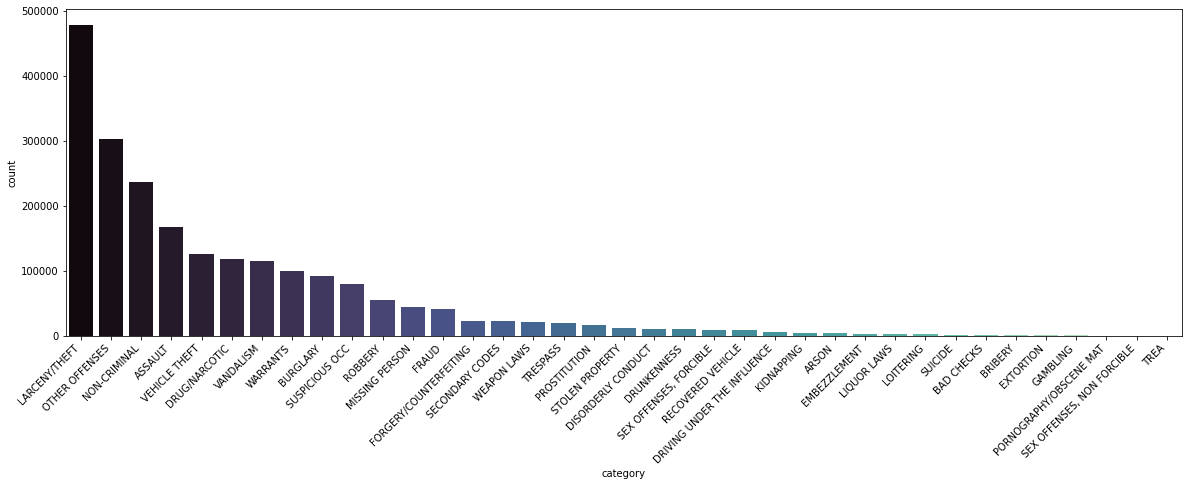

In [0]:
import seaborn as sns

fig_dims = (20,6)
fig = plt.subplots(figsize = fig_dims)
spark_df_q1_opt = spark_df_q1.toPandas()
chart = sns.barplot(x = 'category', y = 'count', palette= 'mako', data = spark_df_q1_opt)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

According to the number of crimes, we can divide crime categorys into three groups based on above chart: high crime rate, medium crime rate and low crime rate

## Counts the number of crimes for different district, and visualize your results

In [0]:
# SQL way
spark_sql_q2 = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(spark_sql_q2)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
# df way
spark_df_q2 = df_opt1.groupBy('PdDistrict').count().orderBy('Count', ascending=False)
display(spark_df_q2)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


Out[10]: [Text(0, 0, 'SOUTHERN'),
 Text(1, 0, 'MISSION'),
 Text(2, 0, 'NORTHERN'),
 Text(3, 0, 'CENTRAL'),
 Text(4, 0, 'BAYVIEW'),
 Text(5, 0, 'TENDERLOIN'),
 Text(6, 0, 'INGLESIDE'),
 Text(7, 0, 'TARAVAL'),
 Text(8, 0, 'PARK'),
 Text(9, 0, 'RICHMOND'),
 Text(10, 0, 'NA')]

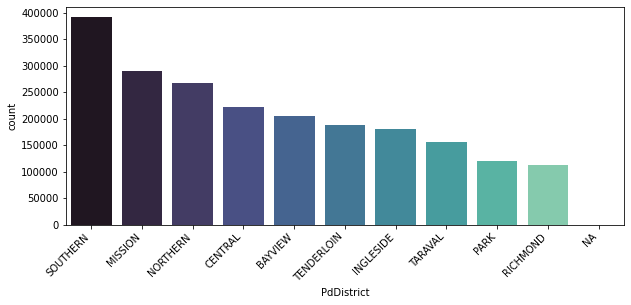

In [0]:
# Visualize Result
fig_dims = (10,4)
fig = plt.subplots(figsize=fig_dims)
spark_df_q2_plot = spark_df_q2.toPandas()
chart = sns.barplot(x = 'PdDistrict', y = 'count', palette= 'mako',data = spark_df_q2_plot )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

### Count the number of crimes each "Sunday" at "SF downtown".   

San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297.

In [0]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90)
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603)
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123)
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449)
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459)
040378011,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191)
041476690,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507)
160101273,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822)
170049243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174)
160658280,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647)


In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
display(df_new.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011


In [0]:
# sql way
spark_sql_q3 = spark.sql("SELECT Date, DayOfWeek, COUNT(*) AS Count FROM sf_crime WHERE DayOfWeek = 'Sunday' \
                          AND X > -122.4313 AND X < -122.4213 AND Y > 37.7540 AND Y < 37.7740 \
                          GROUP BY Date, DayOfWeek ORDER BY Date")
display(spark_sql_q3)

Date,DayOfWeek,Count
01/01/2006,Sunday,20
01/01/2012,Sunday,13
01/01/2017,Sunday,30
01/02/2005,Sunday,8
01/02/2011,Sunday,7
01/03/2010,Sunday,16
01/03/2016,Sunday,9
01/04/2004,Sunday,14
01/04/2009,Sunday,10
01/04/2015,Sunday,11


In [0]:
# df way
sf_downtown = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
spark_df_q3 = df_new.filter((df_new.DayOfWeek == "Sunday") & (sf_downtown)).groupby('Date','DayOfWeek').count().orderBy('Date')
display(spark_df_q3)

Date,DayOfWeek,count
01/01/2006,Sunday,20
01/01/2012,Sunday,13
01/01/2017,Sunday,30
01/02/2005,Sunday,8
01/02/2011,Sunday,7
01/03/2010,Sunday,16
01/03/2016,Sunday,9
01/04/2004,Sunday,14
01/04/2009,Sunday,10
01/04/2015,Sunday,11


### Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
display(df_years.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
160101273,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),2016-02-03,2,2016
170049243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),2017-01-18,1,2017
160658280,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),2016-08-14,8,2016
180322603,DRUG/NARCOTIC,POSSESSION OF HEROIN,Tuesday,05/01/2018,13:27,SOUTHERN,"ARREST, BOOKED",600 Block of STEVENSON ST,-122.41265189435406,37.77951316688882,POINT (-122.41265189435406 37.77951316688882),2018-05-01,5,2018
176125180,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,05/16/2017,13:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,POINT (-122.46620466789287 37.772540539159316),2017-05-16,5,2017


In [0]:
spark_df_q4 = df_years.groupby(['Year','Month']).count().orderBy('Year','Month')
display(spark_df_q4)

Year,Month,count
2015,1,13181
2015,2,11882
2015,3,13463
2015,4,12526
2015,5,13318
2015,6,12853
2015,7,12949
2015,8,13317
2015,9,12476
2015,10,12697


In [0]:
#df_opt2.createOrReplaceTempView('sf_crime’)
spark_sql_q4 = spark.sql("""
                       SELECT SUBSTRING(Date,1,2) AS Month, SUBSTRING(Date,7,4) AS Year, COUNT(*) AS Count
                       FROM sf_crime
                       GROUP BY Year, Month
                       HAVING Year in (2015, 2016, 2017, 2018) 
                       ORDER BY Year, Month
                       """)
display(spark_sql_q4)


Month,Year,Count
01,2015,13181
02,2015,11882
03,2015,13463
04,2015,12526
05,2015,13318
06,2015,12853
07,2015,12949
08,2015,13317
09,2015,12476
10,2015,12697


In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
display(df_new.take(5))
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
display(df_years.take(5))
spark_df_q4 = df_years.groupby(['Year', 'Month']).count().orderBy('Year','Month')
display(spark_df_q4)


IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011


IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
160101273,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),2016-02-03,2,2016
170049243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),2017-01-18,1,2017
160658280,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),2016-08-14,8,2016
180322603,DRUG/NARCOTIC,POSSESSION OF HEROIN,Tuesday,05/01/2018,13:27,SOUTHERN,"ARREST, BOOKED",600 Block of STEVENSON ST,-122.41265189435406,37.77951316688882,POINT (-122.41265189435406 37.77951316688882),2018-05-01,5,2018
176125180,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,05/16/2017,13:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,POINT (-122.46620466789287 37.772540539159316),2017-05-16,5,2017


Year,Month,count
2015,1,13181
2015,2,11882
2015,3,13463
2015,4,12526
2015,5,13318
2015,6,12853
2015,7,12949
2015,8,13317
2015,9,12476
2015,10,12697


a. It is very obvious from the above figure that the crime rate from 2015 to 2017 is very high, especially the theft crime, and there has been a downward trend in 2018, especially in May.

b. The crime rate has been so high since 2015, it may be because of the 47th Act signed by the governor in the California referendum in 2014, which led to a large number of theft and robbery crimes.

c. Through online research, the reason for the decline in crime rate since 2018 may be that the San Francisco Police Department has increased uniformed police patrols, hence violence and theft activities have been greatly reduced. In addition, the San Francisco Police Department stepped up its crackdown on the drug trade, which is also one of the reasons for the decline in crime rate.

#### Analysis the number of crime with respsect to the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
from pyspark.sql.functions import to_timestamp
# add new columns to convert Time to hour format
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'],'HH:mm')) 
# extract hour from incident time
df_new1 = df_new1.withColumn('Hour',hour(df_new1['IncidentTime']))
display(df_new1.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year,IncidentTime,Hour
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003,1970-01-01T10:00:00.000+0000,10
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005,1970-01-01T12:20:00.000+0000,12
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006,1970-01-01T00:55:00.000+0000,0
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007,1970-01-01T00:01:00.000+0000,0
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011,1970-01-01T11:00:00.000+0000,11


In [0]:
dates = ['12/15/2015','12/15/2016','12/15/2017']
df_days = df_new1[df_new1.Date.isin(dates)]
spark_df_q5_1 = df_days.groupby('Hour','Date').count().orderBy('Date','Hour')
display(spark_df_q5_1)

Hour,Date,count
0,12/15/2015,15
1,12/15/2015,6
2,12/15/2015,5
3,12/15/2015,4
4,12/15/2015,10
5,12/15/2015,3
6,12/15/2015,4
7,12/15/2015,8
8,12/15/2015,12
9,12/15/2015,10


It can be clearly seen that 12 o'clock and 18 o'clock peaked. This time period is the time for tourists to rest in hotel or safe indoor place. If tourists happend to be outside, be careful about arroundings, do not wear earphones and don't focus on models

#### Find out the top-3 danger disrict  and find out the crime event w.r.t category and time (hour)

In [0]:
#df way
spark_df_q6_s1 = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False)
display(spark_df_q6_s1)

PdDistrict,count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


In [0]:
top3_danger = df_new.groupby('PdDistrict').count().orderBy('count',ascending = False).head(3)
top3_danger_district = [top3_danger[i][0] for i in range(3)]
top3_danger_district

Out[24]: ['SOUTHERN', 'MISSION', 'NORTHERN']

a. The three most dangerous districts are SOUTHERN, MISSION and NORTHERN.

In [0]:
#sql way
spark_sql_q6_s1 = spark.sql( """
                             SELECT PdDistrict, COUNT(*) as Count
                             FROM sf_crime
                             GROUP BY 1
                             ORDER BY 2 DESC
                             LIMIT 3 
                             """ )
display(spark_sql_q6_s1)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


In [0]:
# df way
spark_df_q6_s2 = df_new1.filter(df_new1.PdDistrict.isin('SOUTHERN', 'MISSION', 'NORTHERN')).groupby('Category','Hour').count().orderBy('Category','Hour')
display(spark_df_q6_s2)

Category,Hour,count
ARSON,0,84
ARSON,1,77
ARSON,2,84
ARSON,3,95
ARSON,4,74
ARSON,5,60
ARSON,6,50
ARSON,7,28
ARSON,8,34
ARSON,9,28


b. We can see from the picture above that among the top three dangerous streets, the crime rate around 5 am is the lowest, and the high incidence of crime rate is around 12pm and 18pm, especially pay attention to theft, so I recommend to increase police patrol during that periods.

#### For different category of crime, find the percentage of resolution.

In [0]:
%sql select distinct(resolution) as resolve from sf_crime

resolve
EXCEPTIONAL CLEARANCE
"ARREST, BOOKED"
PROSECUTED FOR LESSER OFFENSE
LOCATED
UNFOUNDED
DISTRICT ATTORNEY REFUSES TO PROSECUTE
PSYCHOPATHIC CASE
COMPLAINANT REFUSES TO PROSECUTE
"ARREST, CITED"
PROSECUTED BY OUTSIDE AGENCY


In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window
resolution_func = udf (lambda x: x != 'NONE')
spark_df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
spark_df_q7 = spark_df_q7.groupBy('category', 'Resolution', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
spark_df_q7 = spark_df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(spark_df_q7.IsResolution == True).orderBy('percentage%', ascending=False)
display(spark_df_q7)

category,Resolution,IsResolution,resolved,total,percentage%
WARRANTS,"ARREST, BOOKED",true,93092,99821,93.25893349094879
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",true,4941,5652,87.42038216560509
STOLEN PROPERTY,"ARREST, BOOKED",true,9693,11450,84.65502183406113
DRUG/NARCOTIC,"ARREST, BOOKED",true,97926,117821,83.11421563218781
DRUNKENNESS,"ARREST, BOOKED",true,7471,9760,76.54713114754098
LIQUOR LAWS,"ARREST, BOOKED",true,1839,2840,64.75352112676056
WEAPON LAWS,"ARREST, BOOKED",true,13334,21004,63.48314606741573
LOITERING,"ARREST, CITED",true,1432,2402,59.61698584512906
PROSTITUTION,"ARREST, CITED",true,9667,16501,58.584328222531965
BRIBERY,"ARREST, BOOKED",true,418,796,52.51256281407035


#### Analysis the new columns of the data and find how to use the new columns (e.g., like 'Fire Prevention Districts' etc)

In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window
resolution_func = udf (lambda x: x != 'NONE')
spark_df_q7 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
spark_df_q7 = spark_df_q7.groupBy('category', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category')
spark_df_q7 = spark_df_q7.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(spark_df_q7.IsResolution == True).orderBy('percentage%', ascending=False)

display(spark_df_q7)

category,IsResolution,resolved,total,percentage%
PROSTITUTION,true,15651,16501,94.84879704260348
WARRANTS,true,94339,99821,94.50816962362629
DRIVING UNDER THE INFLUENCE,true,5335,5652,94.39136588818117
DRUG/NARCOTIC,true,107565,117821,91.2952699433887
LIQUOR LAWS,true,2527,2840,88.97887323943662
LOITERING,true,2103,2402,87.55203996669442
STOLEN PROPERTY,true,10011,11450,87.43231441048034
DRUNKENNESS,true,8035,9760,82.32581967213115
OTHER OFFENSES,true,215059,301874,71.24131260062146
WEAPON LAWS,true,14934,21004,71.1007427156732


The top four categories of crimes resolved are PROSTITUTION, WARRANTS, DRIVING UNDER THE INFLUENCE, DRUG/NARCOTIC.
The categories which less than 10% of crimes resolved are RECOVERED VEHICLE, VEHICLE THEFT, and LARCENY/THEFT.
My recommendation would be to increase the police force against theft crimes.

### Conclusion. 
To sum up, this analysis aims to understand the crime situation in San Francisco.The Analysis are performed via PySpark and Spark SQL. By knowing which type of crime happended the  most we can brought up certain way to address that. There's large amount of thef in the city, not only can we put more polices on the street to protect people but also increase the amount of fine if arrested. Then we can know what time in the day has higher rate of crime activity which also can help up to put police resource into effective use. Moreover, knowing the crime activity during holiday (Christmas) is vital to protect tourists.

### Clustering on Spatial Data and Visualize the Clustering Results

In [0]:
df = spark.read.format("csv").option("header", "true").load(data_path)
display(df)

# Extract useful feature: longtitute, latitute and PdId
model_data = df[['PdId', 'X', 'Y']]
display(model_data)

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
16010127305073,160101273,05073,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),53,3,9,20,8,4,8,28853,19,null,null,null,3,null,null,2,null,null,3,null,53
17004924306243,170049243,06243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),39,10,7,35,1,8,3,56,35,null,null,null,null,null,null,1,null,null,null,null,39
16065828006244,160658280,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),41,10,8,16,1,8,4,64,14,null,null,null,null,null,null,2,null,null,null,null,41


PdId,X,Y
3114751606302,-120.5,90
5069701104134,-122.428223303176,37.7818959488603
6074729204104,-122.410672425337,37.799788690123
7103536315201,-122.458226300605,37.7413616001449
11082415274000,-122.459172646607,37.7082001648459
4037801104134,-122.386667033903,37.7898821569191
4147669007025,-122.407531316146,37.723291086507
16010127305073,-122.40952991327822,37.76571843952822
17004924306243,-122.49522504431104,37.75341185338174
16065828006244,-122.47564746078615,37.72852806274646


In [0]:
# Check data types of data
print(model_data.dtypes)
# We need to change latitute and longtitute from string to numerical value
from pyspark.sql.types import DoubleType
model_data = model_data.withColumn("X", model_data["X"].cast(DoubleType()))
model_data = model_data.withColumn("Y", model_data["Y"].cast(DoubleType()))
print(model_data.dtypes)

[('PdId', 'string'), ('X', 'string'), ('Y', 'string')]
[('PdId', 'string'), ('X', 'double'), ('Y', 'double')]


In [0]:
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
new_df = vecAssembler.transform(model_data)
new_df.show()

+--------------+-------------------+------------------+--------------------+
|          PdId|                  X|                 Y|            features|
+--------------+-------------------+------------------+--------------------+
| 3114751606302|             -120.5|              90.0|       [-120.5,90.0]|
| 5069701104134|  -122.428223303176|  37.7818959488603|[-122.42822330317...|
| 6074729204104|  -122.410672425337|   37.799788690123|[-122.41067242533...|
| 7103536315201|  -122.458226300605|  37.7413616001449|[-122.45822630060...|
|11082415274000|  -122.459172646607|  37.7082001648459|[-122.45917264660...|
| 4037801104134|  -122.386667033903|  37.7898821569191|[-122.38666703390...|
| 4147669007025|  -122.407531316146|   37.723291086507|[-122.40753131614...|
|16010127305073|-122.40952991327822| 37.76571843952822|[-122.40952991327...|
|17004924306243|-122.49522504431104| 37.75341185338174|[-122.49522504431...|
|16065828006244|-122.47564746078615| 37.72852806274646|[-122.47564746078...|

In [0]:
# Using Kmeans to cluster the spacial data
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=3, seed=1)  # 3 clusters here
model = kmeans.fit(new_df.select('features'))


In [0]:
transformed = model.transform(new_df)
transformed.show() 

+--------------+-------------------+------------------+--------------------+----------+
|          PdId|                  X|                 Y|            features|prediction|
+--------------+-------------------+------------------+--------------------+----------+
| 3114751606302|             -120.5|              90.0|       [-120.5,90.0]|         1|
| 5069701104134|  -122.428223303176|  37.7818959488603|[-122.42822330317...|         0|
| 6074729204104|  -122.410672425337|   37.799788690123|[-122.41067242533...|         0|
| 7103536315201|  -122.458226300605|  37.7413616001449|[-122.45822630060...|         2|
|11082415274000|  -122.459172646607|  37.7082001648459|[-122.45917264660...|         2|
| 4037801104134|  -122.386667033903|  37.7898821569191|[-122.38666703390...|         0|
| 4147669007025|  -122.407531316146|   37.723291086507|[-122.40753131614...|         0|
|16010127305073|-122.40952991327822| 37.76571843952822|[-122.40952991327...|         0|
|17004924306243|-122.49522504431

In [0]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(transformed)
print("Within Set Sum of Squared Errors = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Within Set Sum of Squared Errors = 0.6686416818462297
Cluster Centers: 
[-122.41254347   37.77372869]
[-120.5   90. ]
[-122.46010181   37.74695908]


The sum of square is small

In [0]:
# Put cluster label back to data
merged_df = df.unionByName(transformed, allowMissingColumns=True)

### Visualize the average number of crimes in each cluster

In [0]:
from pyspark.sql.types import IntegerType
merged_df = merged_df.withColumn("IncidntNum", merged_df["IncidntNum"].cast(IntegerType()))
merged_df.groupBy('prediction').mean('IncidntNum').show()

+----------+--------------------+
|prediction|     avg(IncidntNum)|
+----------+--------------------+
|      null|1.0424100287395827E8|
|         1| 4.390498145390071E7|
|         2|1.0414977420730214E8|
|         0|1.0427155700845647E8|
+----------+--------------------+



we can see the cluster 1 has highest average number of incident, the geo-location is around [-122.41254347   37.77372869].

### Time series analysis
This part is not based on Spark, and only based on Pandas Time Series package.   

process:  
1.visualize time series  
2.plot ACF and find optimal parameter  
3.Train ARIMA  
4.Prediction

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
sns.set(color_codes=True)

In [0]:
import pandas as pd
import io
import requests
url="https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')), index_col=0)


/databricks/python/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
df.head()

,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
PdId,,,,,,,,,,,,,,,,,,,,,
3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,97.0
6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,106.0
7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize the time series

Out[78]: <AxesSubplot:title={'center':'Monthly Incident Number'}>

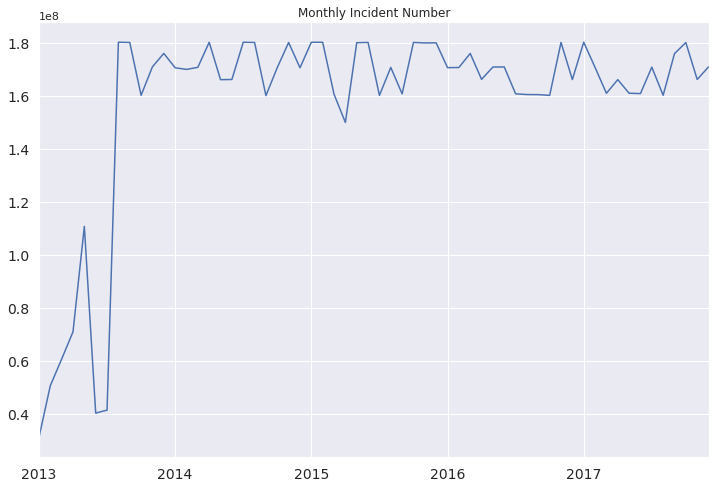

In [0]:
# Reset Index
df.index.name=None 
df.reset_index(inplace=True)
df.drop(df.index[60:], inplace=True)
start = datetime.datetime.strptime("2013-01-01", "%Y-%m-%d") #把一个时间字符串解析为时间元组
date_list = [start + relativedelta(months=x) for x in range(0,60)]  #从2013-01-01开始逐月增加组成list
df['index'] = date_list
df.set_index(['index'], inplace=True)
df.index.name=None
df.IncidntNum.plot(figsize=(12,8), title= 'Monthly Incident Number', fontsize=14)

From the chart above we can see there's seasonal trend

<command-1819130013432920>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df.IncidntNum, freq=12)
<Figure size 432x288 with 0 Axes>

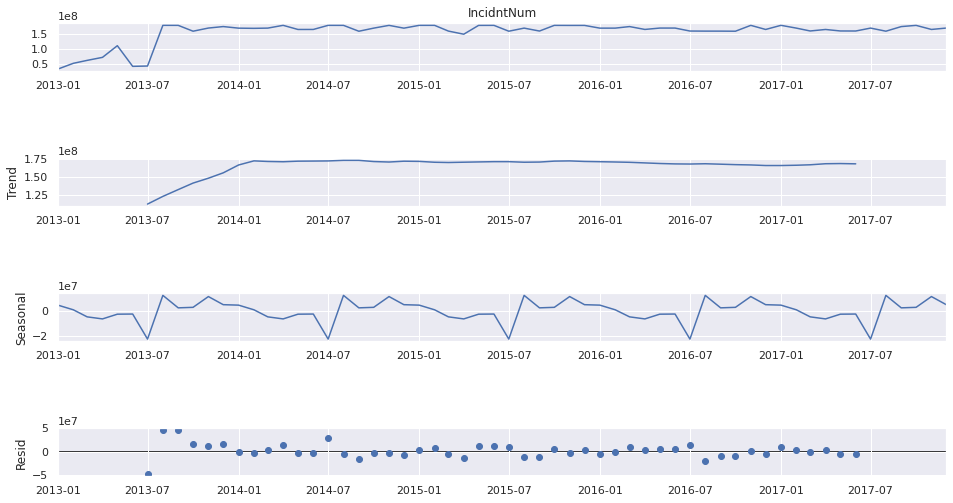

In [0]:
# Use seasonal decopose function can double check the seasonal trend 
decomposition = seasonal_decompose(df.IncidntNum, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [0]:
# Get the trend, seasonal and residual
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

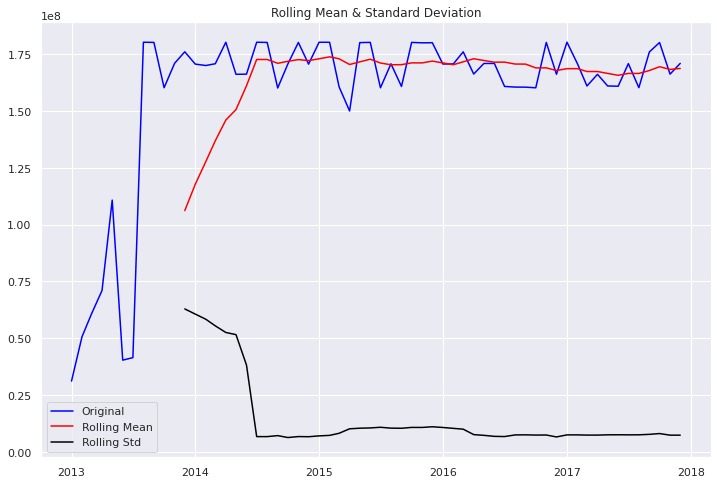

Results of Dickey-Fuller Test:
Test Statistic                 -3.902451
p-value                         0.002017
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [0]:
from statsmodels.tsa.stattools import adfuller
## Use Dicky-Fuller test to say if it's stationary
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df.IncidntNum)

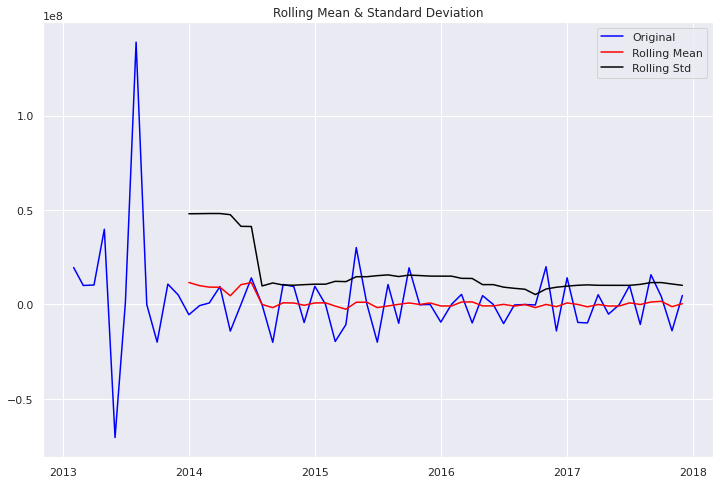

Results of Dickey-Fuller Test:
Test Statistic                -9.516958e+00
p-value                        3.138408e-16
#Lags Used                     1.000000e+00
Number of Observations Used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64


In [0]:
# We first remove the overall trend of the series with 1st order difference
df['first_difference'] = df.IncidntNum - df.IncidntNum.shift(1)    #也可以使用diff()
test_stationarity(df.first_difference.dropna(inplace=False))

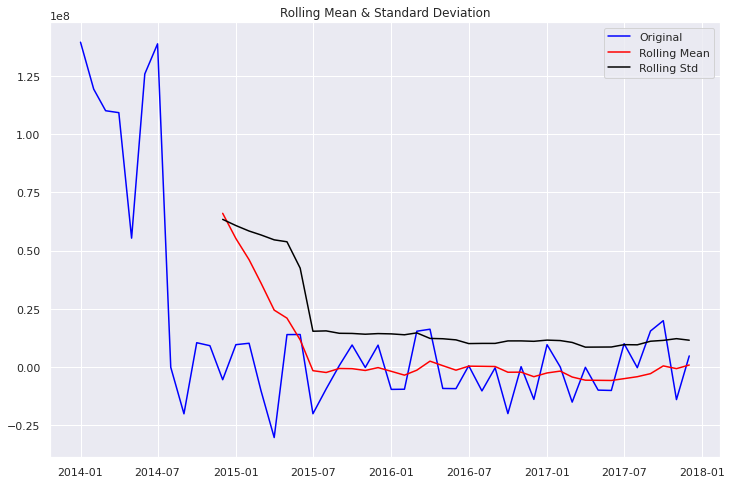

Results of Dickey-Fuller Test:
Test Statistic                 -3.303785
p-value                         0.014710
#Lags Used                      1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [0]:
# Using seasonal difference to remove seasonality
df['seasonal_difference'] = df.IncidntNum - df.IncidntNum.shift(12)  
test_stationarity(df.seasonal_difference.dropna(inplace=False))

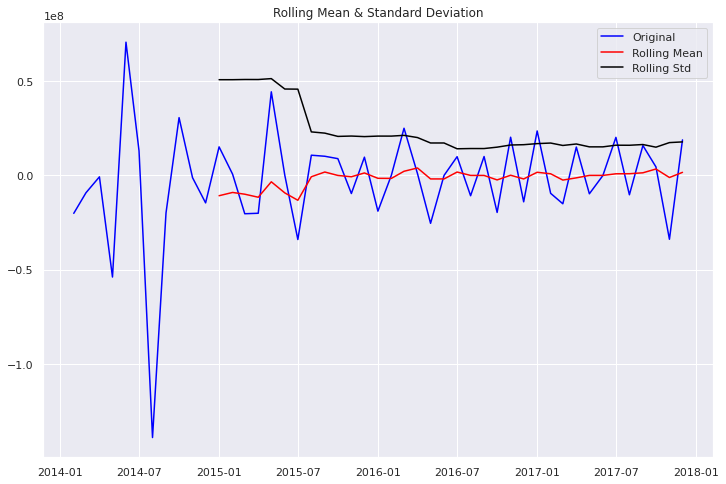

Results of Dickey-Fuller Test:
Test Statistic                 -3.676891
p-value                         0.004450
#Lags Used                      7.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [0]:
# Add seasonal difference to 1st difference
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(12)  
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

We can see the time-series is stationary

### plot ACF and find optimal parameter

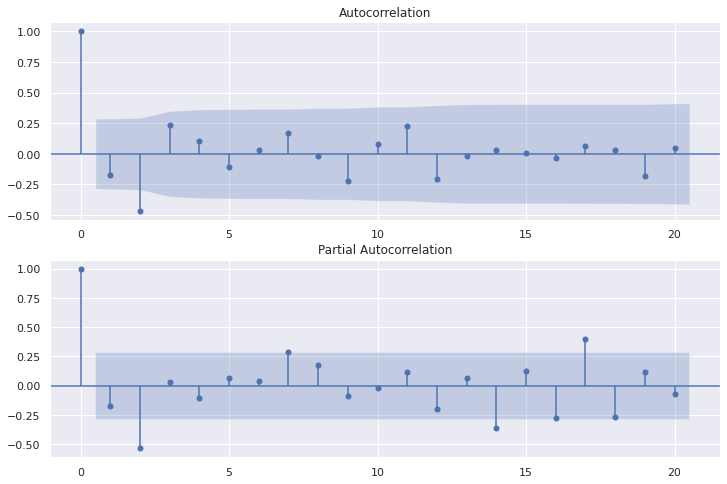

In [0]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=20, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:], lags=20, ax=ax2)


The series have positive autocorrelations out to a high number of lags, then it probably don't need a higher order of differencing.

### Train ARIMA

We can choose (0,1,0) and (1,1,0,12) as parameters

In [0]:
mod = sm.tsa.statespace.SARIMAX(df.IncidntNum, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
                                      SARIMAX Results                                       
Dep. Variable:                           IncidntNum   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -857.291
Date:                     

In [0]:
mod = sm.tsa.statespace.SARIMAX(df.IncidntNum, trend='n', order=(0,1,0), seasonal_order=(1,1,0,12))
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         IncidntNum   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -862.376
Date:                            Mon, 02 May 2022   AIC                           1728.752
Time:                                    22:22:06   BIC                           1732.452
Sample:                                01-01-2013   HQIC                          1730.144
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5550      0.019    -28.485      0.000      -0.593      -0.517
sigma2      2.584e+14   1.96e-18   

###Prediction

Out[108]: <AxesSubplot:>

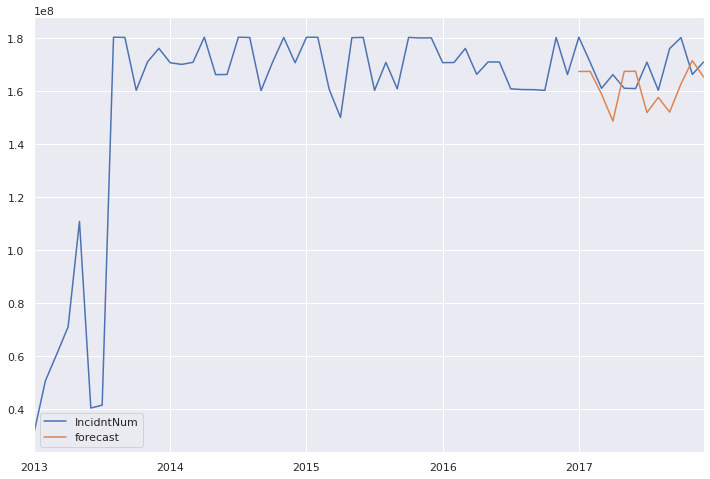

In [0]:
df['forecast'] = results.predict(start = 48, end= 60, dynamic= True)  
df[['IncidntNum', 'forecast']].plot(figsize=(12, 8))

In [0]:
start = datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= df.columns)
df = pd.concat([df, future])

Out[110]: <AxesSubplot:>

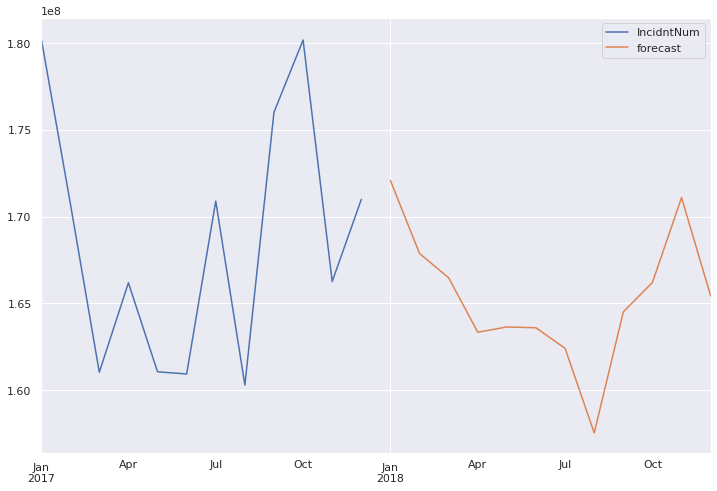

In [0]:
df['forecast'] = results.predict(start = 60, end = 72, dynamic= True)  
df[['IncidntNum', 'forecast']].iloc[-24:].plot(figsize=(12, 8))